In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
cpu = pd.read_json('raw_data/cpu.json')
gpu = pd.read_json('raw_data/video-card.json')
mem = pd.read_json('raw_data/memory.json')
psu = pd.read_json('raw_data/power-supply.json')
hdd = pd.read_json('raw_data/internal-hard-drive.json')
case = pd.read_json('raw_data/case.json')
cooler = pd.read_json('raw_data/cpu-cooler.json')
mobo = pd.read_json('raw_data/motherboard.json')

In [4]:
import random
def spread_value(rating):
    if rating == 0:
        rating += random.randrange(0, 4, 1) / 10
    elif rating == 5:
        rating += random.randrange(-5, 0, 1) / 10
    else:
        rating += random.randrange(-5, 4, 1) / 10
    return rating

def recalc_perf(column):
    reference = column.max()
    new_perf = column.apply(lambda x: round((x/reference)*100, 2))
    return new_perf

In [5]:
mobo

,name,rating,rating_count,price_usd,socket_/_cpu,form_factor,memory_max,memory_slots,color
0,Asus TUF GAMING X570-PLUS (WI-FI),4,207,192.99,AM4,ATX,128 GB,4,Black / Gold
1,MSI B450 TOMAHAWK MAX,4,216,99.95,AM4,ATX,64 GB,4,Black
2,Asus ROG STRIX B550-F GAMING (WI-FI),4,67,189.99,AM4,ATX,128 GB,4,Black
3,MSI MAG B550 TOMAHAWK,4,74,149.99,AM4,ATX,128 GB,4,Black / Silver
4,ASRock B450M Pro4,4,123,76.98,AM4,Micro ATX,64 GB,4,Black / Silver
...,...,...,...,...,...,...,...,...,...
3595,Asus ROG Strix X570-F Gaming,4,11,299.79,AM4,ATX,128 GB,4,Black
3596,MSI Z590-A PRO,0,0,189.99,LGA1200,ATX,128 GB,4,Black
3597,MSI B450 TOMAHAWK MAX II,4,2,99.95,AM4,ATX,128 GB,4,Black / Silver
3598,Asus PRIME B550M-A (WI-FI),4,7,121.00,AM4,Micro ATX,128 GB,4,Black / White


# 1 gpu

In [6]:
gpu_notna = gpu.copy().loc[gpu.price_usd.notna()]

In [8]:
nvidia_gpu = ['GeForce RTX 3070', 'GeForce GTX 1660 SUPER', 'GeForce RTX 3090', 'GeForce GTX 1650 SUPER', 'GeForce RTX 3080', 'GeForce RTX 3060', 'GeForce RTX 2060',
              'GeForce RTX 3070 Ti', 'GeForce GTX 1660', 'GeForce RTX 3080 Ti', 'GeForce GTX 1660 Ti','GeForce RTX 2070 SUPER', 'GeForce RTX 2080 Ti',
              'GeForce GTX 1650 G5']
radeon_gpu = ['Radeon RX 6700 XT', 'Radeon RX 6800 XT']
gpu_include = nvidia_gpu + radeon_gpu
gpu_include.sort()
gpu_include

['GeForce GTX 1650 G5',
 'GeForce GTX 1650 SUPER',
 'GeForce GTX 1660',
 'GeForce GTX 1660 SUPER',
 'GeForce GTX 1660 Ti',
 'GeForce RTX 2060',
 'GeForce RTX 2070 SUPER',
 'GeForce RTX 2080 Ti',
 'GeForce RTX 3060',
 'GeForce RTX 3070',
 'GeForce RTX 3070 Ti',
 'GeForce RTX 3080',
 'GeForce RTX 3080 Ti',
 'GeForce RTX 3090',
 'Radeon RX 6700 XT',
 'Radeon RX 6800 XT']

In [9]:
gpu2 = gpu_notna.copy().loc[gpu_notna.chipset.isin(gpu_include)]

In [10]:
gpu2.loc[gpu2.chipset.isin(['GeForce RTX 3070'])].core_clock.value_counts()

1500 MHz    336
Name: core_clock, dtype: int64

In [11]:
# gpu3 = gpu2.copy().loc[gpu2.rating_count > 0]

In [242]:
# gpu3['rating'] = gpu3['rating'].apply(lambda x: spread_value(x))

In [185]:
gpu4 = gpu2.copy().drop_duplicates()
# gpu4.to_csv('data/gpu.csv', index=False)
gpu4.head()

,name,rating,rating_count,price_usd,chipset,memory,core_clock,boost_clock,color,length
0,EVGA XC GAMING,4,19,899.99,GeForce RTX 3060,12 GB,1320 MHz,1882 MHz,Black,201.8 mm
1,Asus DUAL EVO OC,4,15,799.99,GeForce RTX 2060,6 GB,1365 MHz,1785 MHz,Black,242 mm
7,Asus TUF GAMING OC,4,14,537.00,GeForce GTX 1660 SUPER,6 GB,1530 MHz,1845 MHz,Black,206 mm
9,EVGA FTW3 ULTRA GAMING,5,14,2629.00,GeForce RTX 3090,24 GB,1400 MHz,1800 MHz,Black,300 mm
10,MSI GAMING X,4,2,869.00,GeForce RTX 3060,12 GB,1320 MHz,1837 MHz,Black / Silver,276 mm


In [13]:
# gpu_perf.to_csv('gpu_perf.csv')
gpu_perf = pd.read_csv('gpu_perf.csv', index_col=0)

In [14]:
gpu_perf['manufacturer'] = gpu_perf['chipset'].apply(lambda x: 'Nvidia' if x[0] == 'G' else 'AMD' )

In [15]:
gpu_perf2 = gpu_perf.copy()

In [16]:
gpu_perf2['relative_performance'] = recalc_perf(gpu_perf2['relative_performance'])

In [182]:
gpu_perf2

,chipset,relative_performance,manufacturer
0,GeForce GTX 1650 G5,28.71,Nvidia
1,GeForce GTX 1650 SUPER,35.75,Nvidia
2,GeForce GTX 1660,39.27,Nvidia
3,GeForce GTX 1660 SUPER,42.37,Nvidia
4,GeForce GTX 1660 Ti,43.01,Nvidia
5,GeForce RTX 2060,45.36,Nvidia
6,GeForce RTX 2070 SUPER,55.92,Nvidia
7,GeForce RTX 2080 Ti,71.61,Nvidia
8,GeForce RTX 3060,54.32,Nvidia
9,GeForce RTX 3070,66.49,Nvidia


In [183]:
gpu_perf2.to_csv('data/gpu_perf_recalc.csv', index=False)

# 2 cpu

In [12]:
cpu

,name,rating,rating_count,price_usd,core_count,core_clock,boost_clock,tdp,integrated_graphics,smt
0,AMD Ryzen 5 3600,4,1025,245.99,6,3.6 GHz,4.2 GHz,65 W,None,True
1,AMD Ryzen 5 5600X,4,266,299.00,6,3.7 GHz,4.6 GHz,65 W,None,True
2,AMD Ryzen 7 3700X,4,565,286.00,8,3.6 GHz,4.4 GHz,65 W,None,True
3,AMD Ryzen 7 5800X,4,146,399.99,8,3.8 GHz,4.7 GHz,105 W,None,True
4,Intel Core i7-10700K,4,80,319.99,8,3.8 GHz,5.1 GHz,125 W,Intel UHD Graphics 630,True
...,...,...,...,...,...,...,...,...,...,...
1295,AMD Ryzen 5 3500,5,1,NaN,6,3.6 GHz,4.1 GHz,65 W,None,False
1296,AMD A10-9700,0,0,119.99,4,3.5 GHz,3.8 GHz,65 W,Radeon R7 (on-die),False
1297,Intel Core i5-9400,4,12,234.10,6,2.9 GHz,4.1 GHz,65 W,Intel UHD Graphics 630,False
1298,Intel Core i5-3570K,4,462,136.50,4,3.4 GHz,None,77 W,Intel HD Graphics 4000,False


In [13]:
cpu_nona = cpu.copy().loc[cpu.price_usd.notna()]

In [14]:
intel_cpu = ['Intel Core i3-10100',
       'Intel Core i3-10100F', 'Intel Core i3-9100F',
       'Intel Core i5-10400', 'Intel Core i5-10400F',
       'Intel Core i5-10600K', 'Intel Core i5-10600KF',
       'Intel Core i5-11400', 'Intel Core i5-11400F',
       'Intel Core i5-11500', 'Intel Core i5-11600K',
       'Intel Core i5-11600KF', 'Intel Core i5-9400',
       'Intel Core i5-9400F', 'Intel Core i5-9600K',
       'Intel Core i5-9600KF', 'Intel Core i7-10700',
       'Intel Core i7-10700F', 'Intel Core i7-10700K',
       'Intel Core i7-10700KF', 'Intel Core i7-11700',
       'Intel Core i7-11700K', 'Intel Core i7-11700KF','Intel Core i7-9700',
       'Intel Core i7-9700F', 'Intel Core i7-9700K',
       'Intel Core i7-9700KF', 'Intel Core i9-10850K',
       'Intel Core i9-10900', 'Intel Core i9-10900F',
       'Intel Core i9-10900K', 'Intel Core i9-10900KF', 'Intel Core i9-11900K',
       'Intel Core i9-9900K',
       'Intel Core i9-9900K (Standard Folding Box)',
       'Intel Core i9-9900KF']
amd_cpu = ['AMD Ryzen 3 1200 (14nm)', 'AMD Ryzen 3 3100',
       'AMD Ryzen 3 3200G', 'AMD Ryzen 3 3300X',
       'AMD Ryzen 5 1600 (12nm)', 'AMD Ryzen 5 1600 (14nm)',
       'AMD Ryzen 5 2400G', 'AMD Ryzen 5 2600', 'AMD Ryzen 5 2600X',
       'AMD Ryzen 5 3600', 'AMD Ryzen 5 3600X', 'AMD Ryzen 5 3600XT',
       'AMD Ryzen 5 5600X', 'AMD Ryzen 7 1700', 'AMD Ryzen 7 1700X',
       'AMD Ryzen 7 2700', 'AMD Ryzen 7 2700X', 'AMD Ryzen 7 3700X',
       'AMD Ryzen 7 3800X', 'AMD Ryzen 7 3800XT', 'AMD Ryzen 7 5800X',
       'AMD Ryzen 9 3900X', 'AMD Ryzen 9 3950X', 'AMD Ryzen 9 5900X',
       'AMD Ryzen 9 5950X']
cpu_include = intel_cpu + amd_cpu

In [15]:
cpu2 = cpu_nona.copy().loc[cpu_nona.name.isin(cpu_include)].drop_duplicates()

In [26]:
# cpu2['relative_performance'] = 100.0
# cpu2.to_csv('cpu_perf.csv')
cpu_perf = pd.read_csv('cpu_perf.csv', index_col=0)

In [261]:
# cpu_perf2 = cpu_perf.copy().loc[cpu_perf.rating_count > 0]

In [262]:
# cpu_perf2['rating'] = cpu_perf2['rating'].apply(lambda x: spread_value(x))

In [27]:
cpu_perf3 = cpu_perf.copy()
cpu_perf3.head()

,name,rating,rating_count,price_usd,core_count,core_clock,boost_clock,tdp,integrated_graphics,smt,1080p_rel_perf,1440p_rel_perf,single_thread_rel_perf,multi_thread_rel_perf
Column1,,,,,,,,,,,,,,
0,AMD Ryzen 5 3600,4,1025,245.99,6,3.6 GHz,4.2 GHz,65 W,NaN,True,68.63,75.59,73.02,21.41
1,AMD Ryzen 5 5600X,4,266,299.00,6,3.7 GHz,4.6 GHz,65 W,NaN,True,88.51,91.79,89.19,26.15
2,AMD Ryzen 7 3700X,4,565,286.00,8,3.6 GHz,4.4 GHz,65 W,NaN,True,71.43,79.08,76.29,27.47
3,AMD Ryzen 7 5800X,4,146,399.99,8,3.8 GHz,4.7 GHz,105 W,NaN,True,86.85,91.72,92.84,33.48
4,Intel Core i7-10700K,4,80,319.99,8,3.8 GHz,5.1 GHz,125 W,Intel UHD Graphics 630,True,80.66,87.88,82.31,28.17


In [40]:
cpu_perf3['1080p_rel_perf'] = recalc_perf(cpu_perf3['1080p_rel_perf'])
cpu_perf3['1440p_rel_perf'] = recalc_perf(cpu_perf3['1440p_rel_perf'])
cpu_perf3['single_thread_rel_perf'] = recalc_perf(cpu_perf3['single_thread_rel_perf'])
cpu_perf3['multi_thread_rel_perf'] = recalc_perf(cpu_perf3['multi_thread_rel_perf'])

In [29]:
cpu_perf3['manufacturer'] = cpu_perf3['name'].apply(lambda x: 'AMD' if x[0] == 'A' else 'Intel')

In [187]:
cpu_perf3.head()

,name,rating,rating_count,price_usd,core_count,core_clock,boost_clock,tdp,integrated_graphics,smt,1080p_rel_perf,1440p_rel_perf,single_thread_rel_perf,multi_thread_rel_perf,manufacturer
Column1,,,,,,,,,,,,,,,
0,AMD Ryzen 5 3600,4,1025,245.99,6,3.6 GHz,4.2 GHz,65 W,NaN,True,74.21,77.72,73.34,39.96,AMD
1,AMD Ryzen 5 5600X,4,266,299.00,6,3.7 GHz,4.6 GHz,65 W,NaN,True,95.71,94.38,89.58,48.81,AMD
2,AMD Ryzen 7 3700X,4,565,286.00,8,3.6 GHz,4.4 GHz,65 W,NaN,True,77.24,81.31,76.62,51.27,AMD
3,AMD Ryzen 7 5800X,4,146,399.99,8,3.8 GHz,4.7 GHz,105 W,NaN,True,93.91,94.30,93.24,62.49,AMD
4,Intel Core i7-10700K,4,80,319.99,8,3.8 GHz,5.1 GHz,125 W,Intel UHD Graphics 630,True,87.22,90.36,82.67,52.58,Intel


In [31]:
AMD_series = ['Ryzen 1000', 'Ryzen 2000', 'Ryzen 3000', 'Ryzen 5000']
Intel_series = ['9th Gen', '10th Gen', '11th Gen']
cpu_series = AMD_series+Intel_series

In [32]:
# cpu_chipset_socket_df = pd.DataFrame(columns=['manufacturer', 'series', 'chipset', 'socket'])

In [33]:
# cpu_chipset_socket_df.to_csv('cpu_chipset_socket.csv')

In [34]:
cpu_chipset_socket_df = pd.read_csv('cpu_chipset_socket.csv', index_col=0)

In [35]:
LGA1151_chipset = ['B365', 'Z390']
AM4_chipset = ['X570', 'X470', 'X370', 'B550', 'B450', 'B350', 'A520', 'A320']

In [36]:
cpu_chipset_socket_df['socket'] = cpu_chipset_socket_df['chipset'].apply(lambda x: 'LGA1151' if x in LGA1151_chipset else ('AM4' if x in AM4_chipset else 'LGA1200'))

In [37]:
cpu_chipset_socket_df.head()

,manufacturer,series,chipset,socket
0,AMD,Ryzen 1000,X470,AM4
1,AMD,Ryzen 1000,B450,AM4
2,AMD,Ryzen 1000,X370,AM4
3,AMD,Ryzen 1000,B350,AM4
4,AMD,Ryzen 1000,A320,AM4


In [189]:
#cpu_chipset_socket_df.to_csv('data/cpu_chipset_socket.csv', index=False)
#cpu_perf3.to_csv('data/cpu_perf_recalc.csv', index=False)

# 3. Mobo

In [43]:
mobo['socket_/_cpu'].value_counts()

AM4        2484
LGA1200     900
LGA1151     144
sTRX4        72
Name: socket_/_cpu, dtype: int64

In [4]:
mobo

,name,rating,rating_count,price_usd,socket_/_cpu,form_factor,memory_max,memory_slots,color
0,Asus TUF GAMING X570-PLUS (WI-FI),4,207,192.99,AM4,ATX,128 GB,4,Black / Gold
1,MSI B450 TOMAHAWK MAX,4,216,99.95,AM4,ATX,64 GB,4,Black
2,Asus ROG STRIX B550-F GAMING (WI-FI),4,67,189.99,AM4,ATX,128 GB,4,Black
3,MSI MAG B550 TOMAHAWK,4,74,149.99,AM4,ATX,128 GB,4,Black / Silver
4,ASRock B450M Pro4,4,123,76.98,AM4,Micro ATX,64 GB,4,Black / Silver
...,...,...,...,...,...,...,...,...,...
3595,Asus ROG Strix X570-F Gaming,4,11,299.79,AM4,ATX,128 GB,4,Black
3596,MSI Z590-A PRO,0,0,189.99,LGA1200,ATX,128 GB,4,Black
3597,MSI B450 TOMAHAWK MAX II,4,2,99.95,AM4,ATX,128 GB,4,Black / Silver
3598,Asus PRIME B550M-A (WI-FI),4,7,121.00,AM4,Micro ATX,128 GB,4,Black / White


In [44]:
mobo_nona = mobo.copy().loc[mobo.price_usd.notna()]

In [45]:
mobo2 = mobo_nona.copy().loc[mobo['socket_/_cpu'].isin(['AM4', 'LGA1200', 'LGA1151'])].drop_duplicates()

In [46]:
mobo2.form_factor.value_counts()

ATX          62
Micro ATX    28
Mini ITX      6
EATX          1
Name: form_factor, dtype: int64

In [47]:
mobo3 = mobo2.copy()

In [48]:
mobo3['chipset'] = mobo2['name'].apply(lambda x: re.findall('[A-Z][0-9][0-9][0-9]', x))

In [49]:
mobo3['chipset'] = mobo3['chipset'].apply(lambda x: x[0] if x else np.nan)

In [50]:
mobo4 = mobo3.copy()

In [51]:
mobo4.loc[mobo3.chipset.isna(),'chipset'] = 'X570'
mobo4.loc[42, 'chipset'] = 'Z590'

In [52]:
mobo4.loc[mobo3.chipset.isna()]

,name,rating,rating_count,price_usd,socket_/_cpu,form_factor,memory_max,memory_slots,color,chipset
14,Asus ROG Crosshair VIII Dark Hero,4,23,449.99,AM4,ATX,128 GB,4,Black / Silver,X570
37,Asus ROG Crosshair VIII Hero (WI-FI),4,39,409.99,AM4,ATX,128 GB,4,Black,X570
42,Asus ROG MAXIMUS XIII HERO,5,1,480.89,LGA1200,ATX,128 GB,4,Black,Z590
64,Asus ROG Crosshair VIII Formula,4,5,587.99,AM4,ATX,128 GB,4,Black,X570
92,Asus ROG Crosshair VIII Hero,4,18,379.99,AM4,ATX,128 GB,4,Black,X570


In [53]:
mobo4

,name,rating,rating_count,price_usd,socket_/_cpu,form_factor,memory_max,memory_slots,color,chipset
0,Asus TUF GAMING X570-PLUS (WI-FI),4,207,192.99,AM4,ATX,128 GB,4,Black / Gold,X570
1,MSI B450 TOMAHAWK MAX,4,216,99.95,AM4,ATX,64 GB,4,Black,B450
2,Asus ROG STRIX B550-F GAMING (WI-FI),4,67,189.99,AM4,ATX,128 GB,4,Black,B550
3,MSI MAG B550 TOMAHAWK,4,74,149.99,AM4,ATX,128 GB,4,Black / Silver,B550
4,ASRock B450M Pro4,4,123,76.98,AM4,Micro ATX,64 GB,4,Black / Silver,B450
...,...,...,...,...,...,...,...,...,...,...
95,Asus ROG Strix X570-F Gaming,4,11,299.79,AM4,ATX,128 GB,4,Black,X570
96,MSI Z590-A PRO,0,0,189.99,LGA1200,ATX,128 GB,4,Black,Z590
97,MSI B450 TOMAHAWK MAX II,4,2,99.95,AM4,ATX,128 GB,4,Black / Silver,B450
98,Asus PRIME B550M-A (WI-FI),4,7,121.00,AM4,Micro ATX,128 GB,4,Black / White,B550


In [66]:
mobo5 = mobo4.copy()
#.loc[mobo4.rating_count > 0]

In [67]:
mobo5['memory_type'] = 'DDR4'

In [68]:
#mobo5['rating'] = mobo5['rating'].apply(lambda x: spread_value(x))

In [69]:
mobo5

,name,rating,rating_count,price_usd,socket_/_cpu,form_factor,memory_max,memory_slots,color,chipset,memory_type
0,Asus TUF GAMING X570-PLUS (WI-FI),4,207,192.99,AM4,ATX,128 GB,4,Black / Gold,X570,DDR4
1,MSI B450 TOMAHAWK MAX,4,216,99.95,AM4,ATX,64 GB,4,Black,B450,DDR4
2,Asus ROG STRIX B550-F GAMING (WI-FI),4,67,189.99,AM4,ATX,128 GB,4,Black,B550,DDR4
3,MSI MAG B550 TOMAHAWK,4,74,149.99,AM4,ATX,128 GB,4,Black / Silver,B550,DDR4
4,ASRock B450M Pro4,4,123,76.98,AM4,Micro ATX,64 GB,4,Black / Silver,B450,DDR4
...,...,...,...,...,...,...,...,...,...,...,...
95,Asus ROG Strix X570-F Gaming,4,11,299.79,AM4,ATX,128 GB,4,Black,X570,DDR4
96,MSI Z590-A PRO,0,0,189.99,LGA1200,ATX,128 GB,4,Black,Z590,DDR4
97,MSI B450 TOMAHAWK MAX II,4,2,99.95,AM4,ATX,128 GB,4,Black / Silver,B450,DDR4
98,Asus PRIME B550M-A (WI-FI),4,7,121.00,AM4,Micro ATX,128 GB,4,Black / White,B550,DDR4


In [58]:
AMD_chipsets = ['X570', 'B550', 'X470', 'B450', 'X370', 'B350', 'A320']
Intel_chipsets = ['B560', 'Z490', 'B460', 'Z590', 'Z390', 'B365', 'H410']
all_chipsets = AMD_chipsets + Intel_chipsets

In [190]:
# mobo5.to_csv('data/mobo.csv', index=False)

# 4. psu

In [60]:
psu

,name,rating,rating_count,price_usd,form_factor,efficiency_rating,wattage,modular,color
0,Corsair RM (2019),4,195,124.99,ATX,80+ Gold,750 W,Full,Black
1,EVGA BQ,4,109,64.00,ATX,80+ Bronze,600 W,Semi,None
2,Corsair RM (2019),4,72,134.99,ATX,80+ Gold,850 W,Full,Black
3,EVGA SuperNOVA GA,4,27,84.99,ATX,80+ Gold,650 W,Full,Black
4,Corsair RM (2019),4,58,89.99,ATX,80+ Gold,650 W,Full,Black
...,...,...,...,...,...,...,...,...,...
2295,SeaSonic FOCUS Plus Platinum,4,26,148.00,ATX,80+ Platinum,750 W,Full,None
2296,EVGA SuperNOVA GM,0,0,189.99,SFX,80+ Gold,850 W,Full,Black
2297,SeaSonic FOCUS Plus Gold,4,6,187.98,ATX,80+ Gold,1000 W,Full,Black
2298,Aerocool Integrator,4,6,173.91,ATX,80+ Bronze,500 W,False,Black


In [61]:
psu_nona = psu.copy().loc[psu.price_usd.notna()]

In [62]:
psu2 = psu_nona.copy().drop_duplicates()

In [63]:
psu3 = psu2.copy()

In [64]:
psu3['wattage'] = psu3['wattage'].apply(lambda x: re.findall('\d+', x)[0])

In [71]:
psu4 = psu3.copy()
#.loc[psu3.rating_count > 0]

In [72]:
# psu4['rating'] = psu4['rating'].apply(lambda x: spread_value(x))

In [73]:
psu4

,name,rating,rating_count,price_usd,form_factor,efficiency_rating,wattage,modular,color
0,Corsair RM (2019),4,195,124.99,ATX,80+ Gold,750,Full,Black
1,EVGA BQ,4,109,64.00,ATX,80+ Bronze,600,Semi,None
2,Corsair RM (2019),4,72,134.99,ATX,80+ Gold,850,Full,Black
3,EVGA SuperNOVA GA,4,27,84.99,ATX,80+ Gold,650,Full,Black
4,Corsair RM (2019),4,58,89.99,ATX,80+ Gold,650,Full,Black
...,...,...,...,...,...,...,...,...,...
95,SeaSonic FOCUS Plus Platinum,4,26,148.00,ATX,80+ Platinum,750,Full,None
96,EVGA SuperNOVA GM,0,0,189.99,SFX,80+ Gold,850,Full,Black
97,SeaSonic FOCUS Plus Gold,4,6,187.98,ATX,80+ Gold,1000,Full,Black
98,Aerocool Integrator,4,6,173.91,ATX,80+ Bronze,500,False,Black


In [191]:
#psu4.to_csv('data/psu.csv',index=False)

# 5. mem

In [75]:
mem

,name,rating,rating_count,price_usd,speed,modules,price_/_gb,color,first_word_latency,cas_latency
0,Corsair Vengeance LPX 16 GB,4,338,88.99,DDR4-3200,2 x 8GB,$5.562,Black / Yellow,10 ns,16
1,Corsair Vengeance RGB Pro 16 GB,4,287,103.99,DDR4-3200,2 x 8GB,$6.499,Black,10 ns,16
2,Crucial Ballistix 16 GB,4,57,87.99,DDR4-3200,2 x 8GB,$5.499,Black,10 ns,16
3,G.Skill Trident Z RGB 16 GB,4,92,114.99,DDR4-3600,2 x 8GB,$7.187,Black,10 ns,18
4,Corsair Vengeance RGB Pro 32 GB,4,97,NaN,DDR4-3200,2 x 16GB,None,Black,10 ns,16
...,...,...,...,...,...,...,...,...,...,...
7895,G.Skill Ripjaws V Series 16 GB,4,24,85.99,DDR4-3200,2 x 8GB,$5.374,Red,10 ns,16
7896,Gigabyte AORUS RGB 16 GB,5,2,149.99,DDR4-3600,2 x 8GB,$9.374,Black,10 ns,18
7897,Crucial Ballistix 16 GB,0,0,79.95,DDR4-2666,2 x 8GB,$4.997,White,12.003 ns,16
7898,Corsair Vengeance RGB Pro SL 16 GB,5,2,104.99,DDR4-3600,2 x 8GB,$6.562,Black,10 ns,18


In [76]:
mem_nona = mem.loc[mem.price_usd.notna()]

In [77]:
mem_nona

,name,rating,rating_count,price_usd,speed,modules,price_/_gb,color,first_word_latency,cas_latency
0,Corsair Vengeance LPX 16 GB,4,338,88.99,DDR4-3200,2 x 8GB,$5.562,Black / Yellow,10 ns,16
1,Corsair Vengeance RGB Pro 16 GB,4,287,103.99,DDR4-3200,2 x 8GB,$6.499,Black,10 ns,16
2,Crucial Ballistix 16 GB,4,57,87.99,DDR4-3200,2 x 8GB,$5.499,Black,10 ns,16
3,G.Skill Trident Z RGB 16 GB,4,92,114.99,DDR4-3600,2 x 8GB,$7.187,Black,10 ns,18
5,Crucial Ballistix 16 GB,4,49,86.99,DDR4-3600,2 x 8GB,$5.437,Black,8.889 ns,16
...,...,...,...,...,...,...,...,...,...,...
7895,G.Skill Ripjaws V Series 16 GB,4,24,85.99,DDR4-3200,2 x 8GB,$5.374,Red,10 ns,16
7896,Gigabyte AORUS RGB 16 GB,5,2,149.99,DDR4-3600,2 x 8GB,$9.374,Black,10 ns,18
7897,Crucial Ballistix 16 GB,0,0,79.95,DDR4-2666,2 x 8GB,$4.997,White,12.003 ns,16
7898,Corsair Vengeance RGB Pro SL 16 GB,5,2,104.99,DDR4-3600,2 x 8GB,$6.562,Black,10 ns,18


In [78]:
mem2 = mem_nona.copy().loc[~mem_nona.speed.isin(['DDR3-1600', 'DDR2-800'])].drop_duplicates()

In [37]:
mem2.modules.value_counts()

2 x 8GB     46
2 x 16GB    21
4 x 8GB      8
2 x 4GB      4
1 x 8GB      4
2 x 32GB     4
4 x 32GB     2
1 x 64GB     1
8 x 32GB     1
1 x 4GB      1
4 x 16GB     1
8 x 16GB     1
Name: modules, dtype: int64

In [121]:
mem3 = mem2.copy()

In [122]:
mem3['speed'] = mem3['speed'].apply(lambda x: x[5:])

In [123]:
mem3['DDR'] = 'DDR4'

In [124]:
mem3['modules_no'] = mem3['modules'].apply(lambda x: re.findall('\d+', x)[0])

In [125]:
mem3['modules'] = mem3['modules'].apply(lambda x: x[4:])
mem3['modules'] = mem3['modules'].apply(lambda x: re.findall('\d+', x)[0])

In [109]:
mem4 = mem3.copy()
#.loc[mem3.rating_count > 0]

In [110]:
#mem4['rating'] = mem4['rating'].apply(lambda x: spread_value(x))

In [193]:
# mem3.to_csv('data/mem.csv', index=False)
mem3

,name,rating,rating_count,price_usd,speed,modules,price_/_gb,color,first_word_latency,cas_latency,DDR,modules_no
0,Corsair Vengeance LPX 16 GB,4,338,88.99,3200,8,$5.562,Black / Yellow,10 ns,16,DDR4,2
1,Corsair Vengeance RGB Pro 16 GB,4,287,103.99,3200,8,$6.499,Black,10 ns,16,DDR4,2
2,Crucial Ballistix 16 GB,4,57,87.99,3200,8,$5.499,Black,10 ns,16,DDR4,2
3,G.Skill Trident Z RGB 16 GB,4,92,114.99,3600,8,$7.187,Black,10 ns,18,DDR4,2
5,Crucial Ballistix 16 GB,4,49,86.99,3600,8,$5.437,Black,8.889 ns,16,DDR4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,G.Skill Ripjaws V Series 16 GB,4,24,85.99,3200,8,$5.374,Red,10 ns,16,DDR4,2
96,Gigabyte AORUS RGB 16 GB,5,2,149.99,3600,8,$9.374,Black,10 ns,18,DDR4,2
97,Crucial Ballistix 16 GB,0,0,79.95,2666,8,$4.997,White,12.003 ns,16,DDR4,2
98,Corsair Vengeance RGB Pro SL 16 GB,5,2,104.99,3600,8,$6.562,Black,10 ns,18,DDR4,2


# 6. hdd/ssd

In [130]:
hdd

,name,rating,rating_count,price_usd,capacity,price_/_gb,type,cache,form_factor,interface
0,Seagate Barracuda Compute,4,516,55.49,2 TB,$0.028,7200RPM,256 MB,"3.5""",SATA 6 Gb/s
1,Western Digital Blue SN550,4,139,104.99,1 TB,$0.105,SSD,None,M.2-2280,M.2 (M)
2,Samsung 970 Evo Plus,4,176,159.90,1 TB,$0.160,SSD,1024 MB,M.2-2280,M.2 (M)
3,Samsung 860 Evo,4,268,141.07,1 TB,$0.141,SSD,1024 MB,"2.5""",SATA 6 Gb/s
4,Samsung 980 Pro,4,43,199.99,1 TB,$0.200,SSD,1024 MB,M.2-2280,M.2 (M)
...,...,...,...,...,...,...,...,...,...,...
4195,ADATA SU635,4,12,31.99,240 GB,$0.133,SSD,None,"2.5""",SATA 6 Gb/s
4196,Team MP33,4,2,37.99,256 GB,$0.148,SSD,None,M.2-2280,M.2 (M)
4197,Western Digital Blue SN550,5,2,245.35,2 TB,$0.123,SSD,None,M.2-2280,M.2 (M)
4198,ADATA XPG SX8200 Pro,4,29,249.99,2 TB,$0.125,SSD,None,M.2-2280,M.2 (M)


In [131]:
hdd_nona = hdd.copy().loc[hdd.price_usd.notna()]

In [132]:
hdd2 = hdd_nona.copy().drop_duplicates()

In [133]:
hdd3 = hdd2.copy()
hdd3

In [271]:
# hdd3 = hdd2.copy().loc[hdd2.rating_count > 0]

In [272]:
#hdd3['rating'] = hdd3['rating'].apply(lambda x: spread_value(x))

In [147]:
# hdd3.to_csv('hdd.csv')

In [161]:
hdd3 = pd.read_csv('hdd2.csv', index_col=0)

In [163]:
hdd3['capacity'] = hdd['capacity'].apply(lambda x: (int(re.findall('\d+', x)[0]) * 1000) if x[-2:] == 'TB' else int(re.findall('\d+', x)[0]))

In [194]:
hdd3

,name,rating,rating_count,price_usd,capacity,price_/_gb,type,cache,form_factor,interface,read_speed,write_speed,PCIE_Gen
Column1,,,,,,,,,,,,,
0,Seagate Barracuda Compute,4,516,55.49,2000,$0.028,7200RPM,256 MB,"3.5""",SATA 6 Gb/s,160.0,160.0,NaN
1,Western Digital Blue SN550,4,139,104.99,1000,$0.105,SSD,NaN,M.2-2280,M.2 (M),2400.0,1750.0,3.0
2,Samsung 970 Evo Plus,4,176,159.90,1000,$0.160,SSD,1024 MB,M.2-2280,M.2 (M),3500.0,3300.0,3.0
3,Samsung 860 Evo,4,268,141.07,1000,$0.141,SSD,1024 MB,"2.5""",SATA 6 Gb/s,550.0,520.0,NaN
4,Samsung 980 Pro,4,43,199.99,1000,$0.200,SSD,1024 MB,M.2-2280,M.2 (M),7000.0,5000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ADATA SU635,4,12,31.99,240,$0.133,SSD,NaN,"2.5""",SATA 6 Gb/s,NaN,NaN,NaN
96,Team MP33,4,2,37.99,256,$0.148,SSD,NaN,M.2-2280,M.2 (M),NaN,NaN,NaN
97,Western Digital Blue SN550,5,2,245.35,2000,$0.123,SSD,NaN,M.2-2280,M.2 (M),NaN,NaN,NaN


In [197]:
# hdd3.to_csv('data/hdd.csv', index=False)

In [144]:
int(re.findall('\d+', hdd3.loc[73,'capacity'])[0]) * 1000

250000

# 7. cooler

In [44]:
cooler

,name,rating,rating_count,price_usd,fan_rpm,noise_level,color,radiator_size
0,Cooler Master Hyper 212 EVO,4,1421,24.99,600 - 2000 RPM,9 - 36 dB,None,None
1,Cooler Master Hyper 212 RGB Black Edition,4,175,44.99,650 - 2000 RPM,8 - 30 dB,Black,None
2,Cooler Master MASTERLIQUID ML240L RGB V2,4,40,61.50,650 - 1800 RPM,6 - 27 dB,Black,240 mm
3,NZXT Kraken X53,4,59,119.99,500 - 2000 RPM,21 - 36 dB,Black,240 mm
4,Corsair iCUE H150i ELITE CAPELLIX,4,34,174.99,2400 RPM,10 - 37 dB,Black,360 mm
...,...,...,...,...,...,...,...,...
1395,Noctua NH-U14S TR4-SP3,4,5,89.95,300 - 1500 RPM,19.2 - 24.6 dB,None,None
1396,Cooler Master i71C RGB,4,9,19.99,650 - 1800 RPM,None,Black,None
1397,Cooler Master MasterLiquid ML240L V2 RGB,0,0,211.99,650 - 1800 RPM,8 - 27 dB,White / Black,240 mm
1398,EVGA CLC 280,4,33,90.00,600 - 2200 RPM,16 - 39.5 dB,None,280 mm


In [45]:
cooler_nona = cooler.copy().loc[cooler.price_usd.notna()].drop_duplicates()

In [121]:
cooler2 = cooler_nona.loc[cooler_nona.rating > 0]

In [131]:
cooler3 = cooler2.copy()

In [134]:
cooler3['type'] = cooler2.radiator_size.apply(lambda x: 'Air' if x is None else 'Water')

In [137]:
cooler3

,name,rating,rating_count,price_usd,fan_rpm,noise_level,color,radiator_size,type,heat_sink_height
0,Cooler Master Hyper 212 EVO,4,1421,24.99,600 - 2000 RPM,9 - 36 dB,None,None,Air,None
1,Cooler Master Hyper 212 RGB Black Edition,4,175,44.99,650 - 2000 RPM,8 - 30 dB,Black,None,Air,None
2,Cooler Master MASTERLIQUID ML240L RGB V2,4,40,61.50,650 - 1800 RPM,6 - 27 dB,Black,240 mm,Water,None
3,NZXT Kraken X53,4,59,119.99,500 - 2000 RPM,21 - 36 dB,Black,240 mm,Water,None
4,Corsair iCUE H150i ELITE CAPELLIX,4,34,174.99,2400 RPM,10 - 37 dB,Black,360 mm,Water,None
...,...,...,...,...,...,...,...,...,...,...
94,Noctua NH-D15S,4,78,89.95,300 - 1500 RPM,19.2 - 24.6 dB,None,None,Air,None
95,Noctua NH-U14S TR4-SP3,4,5,89.95,300 - 1500 RPM,19.2 - 24.6 dB,None,None,Air,None
96,Cooler Master i71C RGB,4,9,19.99,650 - 1800 RPM,None,Black,None,Air,None
98,EVGA CLC 280,4,33,90.00,600 - 2200 RPM,16 - 39.5 dB,None,280 mm,Water,None


In [175]:
# cooler3.to_csv('cooler.csv')
cooler4 = pd.read_csv('cooler.csv', index_col=0)

In [176]:
cooler5 = cooler4.copy()
#.loc[cooler4.rating_count > 0]

In [178]:
# cooler5['rating'] = cooler5['rating'].apply(lambda x: spread_value(x))
cooler5['rating'] = cooler5['rating'].apply(lambda x:round(x))

In [364]:
# cooler5['socket'] = [['AM4','LGA1151','LGA1200']] * len(cooler5)

In [172]:
# cooler5 = pd.read_csv('cooler.csv', index_col=0)

In [198]:
# cooler5.to_csv('data/cooler.csv', index=False)

In [196]:
cooler5

,name,rating,rating_count,price_usd,fan_rpm,noise_level,color,radiator_size,type,heat_sink_height,socket,perf_tier
Column1,,,,,,,,,,,,
0,Cooler Master Hyper 212 EVO,4,1421,24.99,600 - 2000 RPM,9 - 36 dB,NaN,NaN,Air,159.0,"['AM4', 'LGA1151', 'LGA1200']",6
1,Cooler Master Hyper 212 RGB Black Edition,4,175,44.99,650 - 2000 RPM,8 - 30 dB,Black,NaN,Air,158.8,"['AM4', 'LGA1151', 'LGA1200']",6
2,Cooler Master MASTERLIQUID ML240L RGB V2,4,40,61.50,650 - 1800 RPM,6 - 27 dB,Black,240 mm,Water,NaN,"['AM4', 'LGA1151']",4
3,NZXT Kraken X53,4,59,119.99,500 - 2000 RPM,21 - 36 dB,Black,240 mm,Water,NaN,"['AM4', 'LGA1151', 'LGA1200']",3
4,Corsair iCUE H150i ELITE CAPELLIX,4,34,174.99,2400 RPM,10 - 37 dB,Black,360 mm,Water,NaN,"['AM4', 'LGA1151', 'LGA1200']",1
...,...,...,...,...,...,...,...,...,...,...,...,...
90,ARCTIC Liquid Freezer II 420,4,5,142.97,200 - 1700 RPM,NaN,Black,420 mm,Water,NaN,"['AM4', 'LGA1151', 'LGA1200']",1
92,EK EK-AIO 360 D-RGB,4,20,154.99,450 - 2600 RPM,36.4 dB,Black,360 mm,Water,NaN,"['AM4', 'LGA1151', 'LGA1200']",1
94,Noctua NH-D15S,4,78,89.95,300 - 1500 RPM,19.2 - 24.6 dB,NaN,NaN,Air,160.0,"['AM4', 'LGA1151', 'LGA1200']",4


# 8. case

In [47]:
case

,name,rating,rating_count,price_usd,type,color,power_supply,side_panel_window,"external_5.25""_bays","internal_3.5""_bays"
0,NZXT H510,4,121,66.98,ATX Mid Tower,White,NaN,Tempered Glass,0,2
1,NZXT H510,4,122,66.98,ATX Mid Tower,Black,NaN,Tempered Glass,0,2
2,Corsair 4000D Airflow,4,78,94.99,ATX Mid Tower,Black,NaN,Tinted Tempered Glass,0,2
3,Phanteks Eclipse P300A Mesh,4,33,49.99,ATX Mid Tower,Black,NaN,Tempered Glass,0,2
4,Lian Li PC-O11 Dynamic,4,81,149.99,ATX Full Tower,Black,NaN,Tempered Glass,0,2
...,...,...,...,...,...,...,...,...,...,...
4395,Rosewill SRM-01B,4,5,NaN,MicroATX Mini Tower,Black,NaN,None,1,2
4396,Corsair Obsidian 500D RGB SE,4,35,264.99,ATX Mid Tower,Black,NaN,Tinted Tempered Glass,0,2
4397,Corsair 4000D,5,3,59.99,ATX Mid Tower,White,NaN,Tempered Glass,0,2
4398,NZXT H510i,4,25,99.99,ATX Mid Tower,Black,NaN,Tempered Glass,0,2


In [48]:
case_nona = case.copy().loc[case.price_usd.notna()].drop_duplicates()

In [123]:
case2 = case_nona.loc[case_nona.rating > 0]

In [141]:
case3 = case2.copy()

In [146]:
case3

,name,rating,rating_count,price_usd,type,color,power_supply,side_panel_window,"external_5.25""_bays","internal_3.5""_bays",cpu_cooler_clearance,gpu_clearance,rad_support
0,NZXT H510,4,121,66.98,ATX Mid Tower,White,NaN,Tempered Glass,0,2,100.0,100.0,420 mm
1,NZXT H510,4,122,66.98,ATX Mid Tower,Black,NaN,Tempered Glass,0,2,100.0,100.0,420 mm
2,Corsair 4000D Airflow,4,78,94.99,ATX Mid Tower,Black,NaN,Tinted Tempered Glass,0,2,100.0,100.0,420 mm
3,Phanteks Eclipse P300A Mesh,4,33,49.99,ATX Mid Tower,Black,NaN,Tempered Glass,0,2,100.0,100.0,420 mm
4,Lian Li PC-O11 Dynamic,4,81,149.99,ATX Full Tower,Black,NaN,Tempered Glass,0,2,100.0,100.0,420 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Fractal Design Define R5,4,51,115.98,ATX Mid Tower,Black,NaN,None,2,8,100.0,100.0,420 mm
96,Corsair Obsidian 500D RGB SE,4,35,264.99,ATX Mid Tower,Black,NaN,Tinted Tempered Glass,0,2,100.0,100.0,420 mm
97,Corsair 4000D,5,3,59.99,ATX Mid Tower,White,NaN,Tempered Glass,0,2,100.0,100.0,420 mm
98,NZXT H510i,4,25,99.99,ATX Mid Tower,Black,NaN,Tempered Glass,0,2,100.0,100.0,420 mm


In [166]:
# case3.to_csv('case.csv')
case4 = pd.read_csv('case.csv', index_col=0)

In [167]:
case5 = case4.copy()
#.loc[case4.rating_count > 0]

In [168]:
#case5['rating'] = case5['rating'].apply(lambda x: spread_value(x))
case5['rating'] = case5['rating'].apply(lambda x: round(x))

In [200]:
# case5.to_csv('data/case.csv', index=False)

In [201]:
case5.head()

,name,rating,rating_count,price_usd,type,color,power_supply,side_panel_window,"external_5.25""_bays","internal_3.5""_bays",cpu_cooler_clearance,gpu_clearance,140rad_support,120rad_support,mobo_support,psu_support
Column1,,,,,,,,,,,,,,,,
0,NZXT H510,4,121,66.98,ATX Mid Tower,White,NaN,Tempered Glass,0,2,165,381,280 mm,240 mm,ATX,ATX
1,NZXT H510,4,122,66.98,ATX Mid Tower,Black,NaN,Tempered Glass,0,2,165,381,280 mm,240 mm,ATX,ATX
2,Corsair 4000D Airflow,4,78,94.99,ATX Mid Tower,Black,NaN,Tinted Tempered Glass,0,2,170,360,280 mm,360 mm,ATX,ATX
3,Phanteks Eclipse P300A Mesh,4,33,49.99,ATX Mid Tower,Black,NaN,Tempered Glass,0,2,165,355,280 mm,240 mm,ATX,ATX
4,Lian Li PC-O11 Dynamic,4,81,149.99,ATX Full Tower,Black,NaN,Tempered Glass,0,2,155,355,280 mm,360 mm,EATX,ATX


In [202]:
import numpy as np

In [203]:
build_budget_allocation = pd.read_csv('build_budget_allocation.csv')

In [204]:
build_budget_allocation.head()

,cpu,cpu_perc,gpu,gpu_perc,mobo,mobo_perc,mem,mem_perc,storage,storage_perc,cooler,cooler_perc,psu,psu_perc,case,case_perc,others_perc,total
0,543.17,0.241425,339.98,0.151112,169.99,0.075556,277.98,0.123555,193.76,0.086121,189.99,0.084446,254.99,0.113336,279.99,0.124448,0.408352,2249.85
1,389.99,0.190887,469.99,0.230044,436.05,0.213432,249.99,0.122362,144.99,0.070968,184.99,0.090546,92.05,0.045055,74.99,0.036705,0.243275,2043.04
2,174.99,0.163557,420.00,0.392560,134.99,0.126171,69.98,0.065408,79.98,0.074755,24.99,0.023357,64.98,0.060735,99.99,0.093457,0.252304,1069.90
3,399.99,0.229499,599.99,0.344252,159.99,0.091796,112.99,0.064829,189.99,0.109009,99.95,0.057348,94.99,0.054502,84.99,0.048764,0.269623,1742.88
4,559.99,0.255039,689.99,0.314246,259.99,0.118409,119.99,0.054648,99.99,0.045539,69.99,0.031876,169.99,0.077420,225.77,0.102824,0.257658,2195.70


In [208]:
np.polyfit(build_budget_allocation['cpu'], build_budget_allocation['total'], 1)

array([  4.3294099 , 464.55473505])

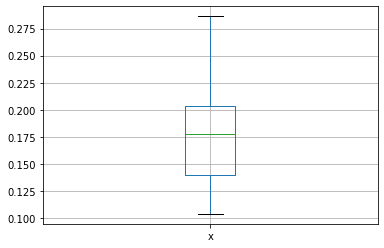

In [217]:
pd.DataFrame.boxplot(build_budget_allocation['cpu_perc'])

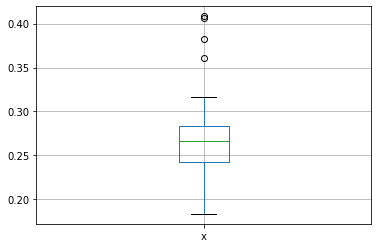

In [247]:
pd.DataFrame.boxplot(build_budget_allocation['others_perc'])

In [210]:
import matplotlib.pyplot as plt

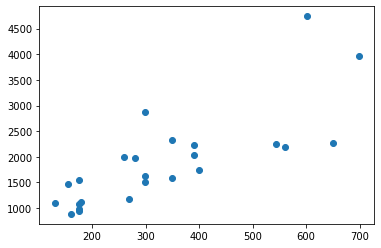

In [219]:
plt.scatter(build_budget_allocation['cpu'], build_budget_allocation['total'])

In [236]:
build_budget_allocation['gpu_perc'].quantile(0.25)

0.30873853175

In [237]:
build_budget_allocation['gpu_perc'].quantile(0.75)

0.40481485424999997

In [238]:
build_budget_allocation['gpu_perc'].quantile(0.5)

0.35912050649999994

In [239]:
build_budget_allocation['gpu_perc'].mean()

0.3487728538333333